# Import necessary packages.

In [26]:
# to read and wrangle data
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for evaluation. module with metrics and plotting functions
import sklearn.metrics as metrics

# to split into test/train subsets
from sklearn.model_selection import train_test_split

# do not display warnings
import warnings
warnings.filterwarnings(action='ignore')

# select better default plotting style
plt.style.use('seaborn-notebook')

# Read the data.

In [27]:
# first, read the table
data = pd.read_csv('gbm_Immune_Neoplastic.csv')

# and look at first few line
data.head(5)

,F1,F2,Class,F4
0,19.555715,-66.420423,Tumor,Neoplastic
1,8.197811,-63.763646,Tumor,Neoplastic
2,-6.468824,-51.283635,Tumor,Neoplastic
3,-9.436247,-53.896430,Tumor,Neoplastic
4,-9.937541,-58.177118,Tumor,Neoplastic


In [28]:
# F1 and F2 are the features we will use for classification
X = data[['F1', 'F2']]

# and F4 is the target feature
y = data.F4

# now split. we put aside 25% of data for testing
# we also use stratification to ensure that Immune/Neoplastic proportions are 
# same between train and test subsets
# we also set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    stratify=y, random_state=42)

# Look at the data.

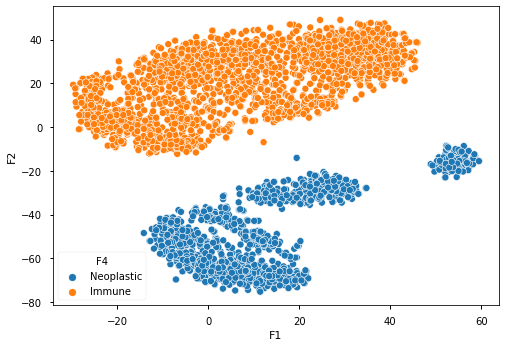

In [29]:
sns.scatterplot(data=data, x='F1', y='F2', hue='F4');

The classes seem to be well-separated, so we should expect good performance.

# Classify.



In [30]:
# import autoclassifier
# we use the new, experimental version, as it should have better performance
from autosklearn.experimental.askl2 import AutoSklearn2Classifier

In [31]:
# create and fit auto-model
model = AutoSklearn2Classifier(60).fit(X_train, y_train)

Using no backup selector


# Evaluate performance.

In [32]:
# first, obtain predictions from the model
y_pred = model.predict(X_test)

# print main classification metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Immune       1.00      1.00      1.00       462
  Neoplastic       1.00      1.00      1.00       273

    accuracy                           1.00       735
   macro avg       1.00      1.00      1.00       735
weighted avg       1.00      1.00      1.00       735



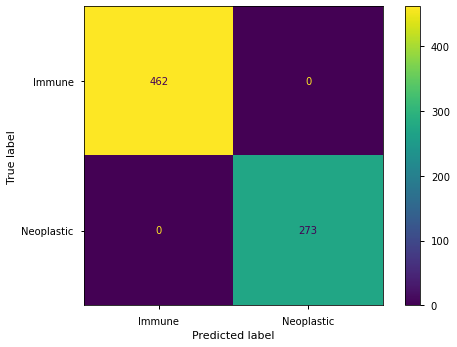

In [33]:
# display confusion matrix
metrics.plot_confusion_matrix(model, X_test, y_test)
# disable grid on the plot
plt.grid(False)

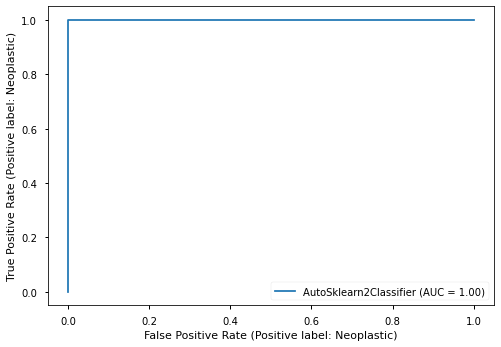

In [34]:
# display the ROC curve
metrics.plot_roc_curve(model, X_test, y_test);

# Discussion

The auto-classifier shows perfect performance, correctly classifying every instance in the testing subset. It achieved this with very short training time of only 60 seconds.

It has to be noted, however, that the data is "easy" as the classes are very clearly separated, so we could have expected similar performance from much simpler classifiers like Logistic Regression or Naive Bayes.